# Breast Cancer Detection using K-Nearest_Neighbors

## Step 0 : Import necessary libraries

In [21]:
# Import libraries
from sklearn.datasets import load_breast_cancer # import iris dataset from sklearn.datasets
from sklearn.model_selection import train_test_split # import train_test_split from sklearn.model_selection to split the dataset intro traininf and test set

from sklearn.neighbors import KNeighborsClassifier #import k Nearest Neighbor classifier form sklearn.neighbors
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix # from sklearn.metrics, we import accuracy-score and confusion_matrix
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt #library to plot results 
import seaborn as sns #import seaborn for statistical graphics 
import pandas as pd
import numpy as np 
 

##  Step 1 :  Import & Split Breast Cancer Dataset

In [25]:
# load Breast Cancer Dataset as a Data Frame 
Breast_cancer = load_breast_cancer(as_frame = True)
data_df = Breast_cancer.frame

# print the 5 last rows of the dataframe
data_df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


In [23]:
column_names = data_df.columns.values.tolist()
feature_names = column_names[:-1]
feature_names

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [24]:
data_df[feature_names]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
#Separate features and target variable
X = data_df.drop(columns='target')
y = data_df['target']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

## Step 2 : Initialize the Classification Models

In [37]:
# Initialize model
knn = KNeighborsClassifier() #Initialise K nearest neighbor classifier

## Step 3 : Train the models

In [38]:
# here we train each model using X train and the traget y train because we are in supervised learning
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Step 4 : Understand the KNN Model

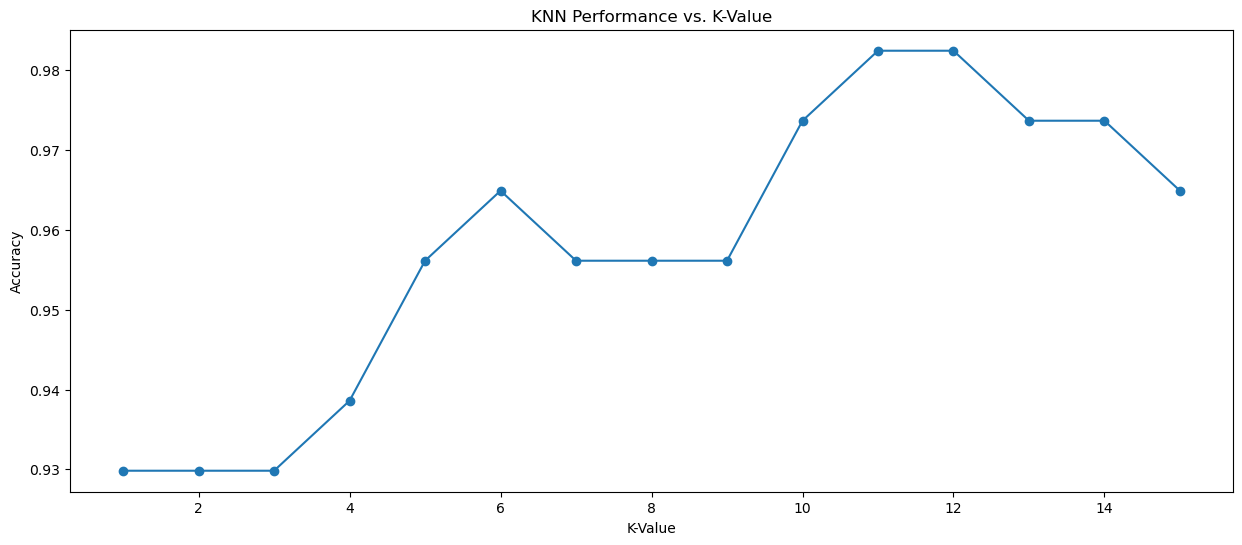

In [32]:
# Define range of K values to test
k_values = np.arange(1, 16)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the accuracy
plt.figure(figsize=(15, 6))
plt.plot(k_values, scores, marker='o')
plt.title('KNN Performance vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


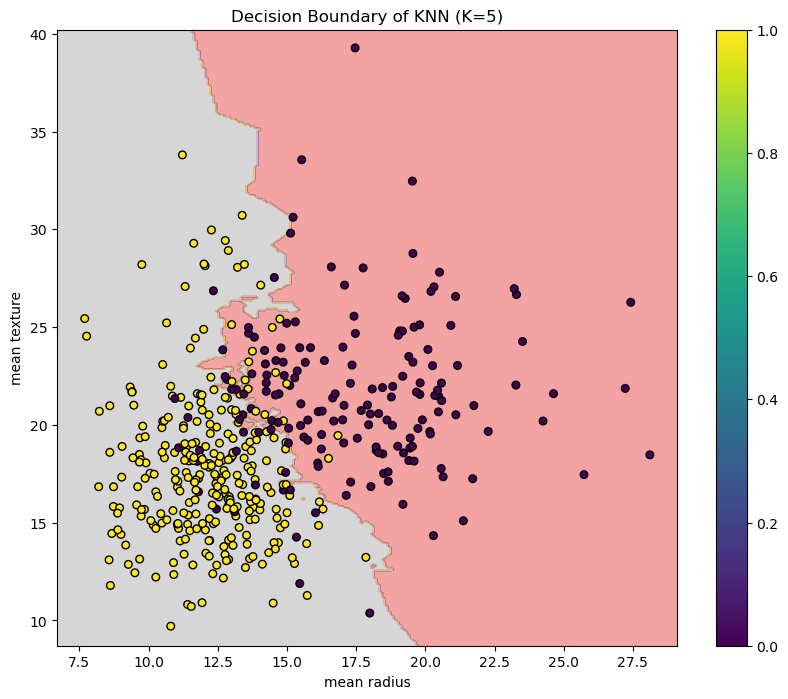

In [35]:
# Assume X_train has only two features for this plot
X_train_2d = X_train.iloc[:, :2]

# Train the KNN classifier on 2D data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2d, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class probabilities for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)

plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, s=30, edgecolor='k') # add cmap=plt.cm.Set1 to see another palette
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Decision Boundary of KNN (K=5)')
plt.colorbar()
plt.show()

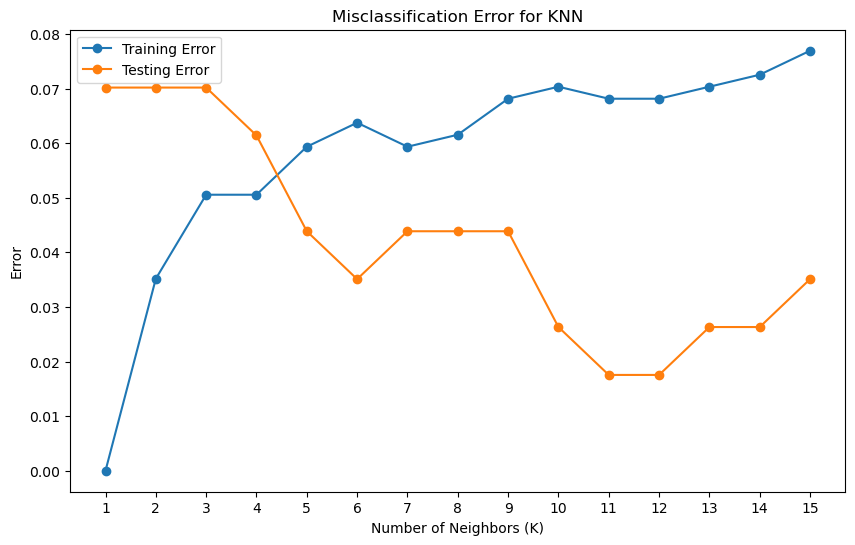

In [33]:
# Define range of K values to test
param_range = np.arange(1, 16)

# Calculate error on training and test set using cross-validation
train_errors, test_errors = [], []
for k in param_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(1 - knn.score(X_train, y_train))
    test_errors.append(1 - knn.score(X_test, y_test))

# Plot misclassification error
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_errors, label='Training Error', marker='o')
plt.plot(param_range, test_errors, label='Testing Error', marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error')
plt.title('Misclassification Error for KNN')
plt.xticks(param_range)
plt.legend()
plt.show()


## Step 5 : Make Predictions

In [39]:
y_pred_knn = knn.predict(X_test)

## Step 6 : Evaluate Models

In [40]:
# Function to calculate results and return as a dictionary
def calculate_results(y_test, y_pred, model_name):
    correct_predictions = np.sum(y_test == y_pred)
    incorrect_predictions = len(y_test) - correct_predictions
    percentage_correct = (correct_predictions / len(y_test)) * 100
    percentage_incorrect = (incorrect_predictions / len(y_test)) * 100
    
    results = {
        'Model': model_name,
        'Correct Predictions': correct_predictions,
        'Incorrect Predictions': incorrect_predictions,
        'Percentage Correct': percentage_correct,
        'Percentage Incorrect': percentage_incorrect
    }
    
    return results

# Collect results for each model
results_list = []
results_list.append(calculate_results(y_test, y_pred_knn, 'KNN'))

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(results_list)

# Display the DataFrame
results_df

,Model,Correct Predictions,Incorrect Predictions,Percentage Correct,Percentage Incorrect
0,KNN,109,5,95.614035,4.385965


### Evaluation metrics

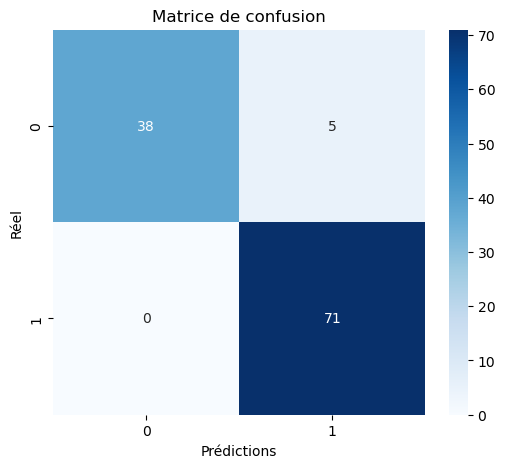

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()


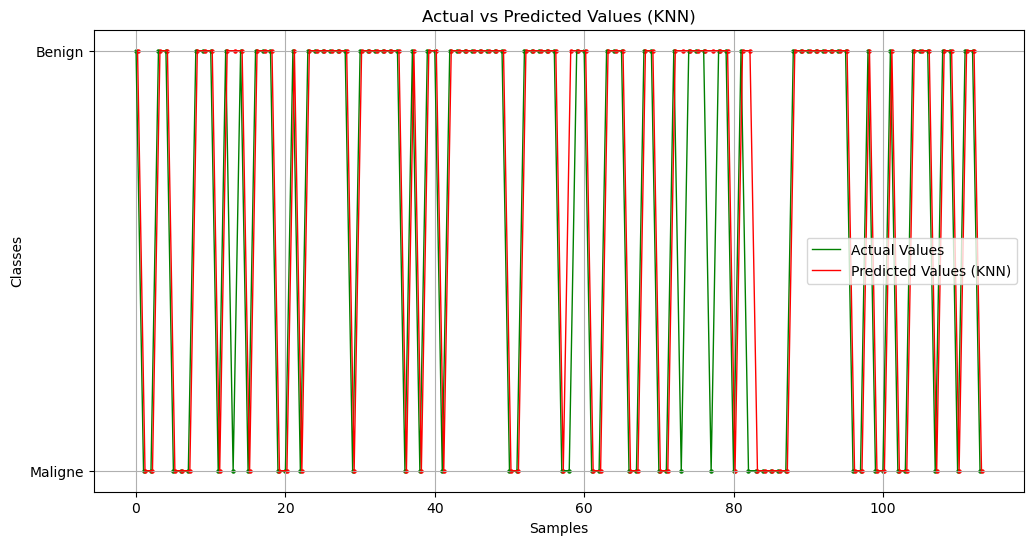

KNN Classifier Performance:
Accuracy: 0.956140350877193
precision: 0.9342105263157895
recall: 1.0
f1_score: 0.9659863945578231


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Define a small shift value
shift = 0.2 #just to show the 2 curves together and see where the prediction is wrong 
correct_color = 'green'
incorrect_color = 'red'

class_names = ['Maligne', 'Benign']

# Plot y_test and y_pred for KNN
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, color=correct_color, label='Actual Values', linewidth=1)  # Make this line thicker
plt.scatter(np.arange(len(y_test)), y_test, color=correct_color, s=5)
plt.plot(np.arange(len(y_pred_knn)) + shift, y_pred_knn, color=incorrect_color, label='Predicted Values (KNN)', linewidth=1)
plt.scatter(np.arange(len(y_pred_knn)) + shift, y_pred_knn, color=incorrect_color, s=5)
plt.yticks(range(len(class_names)), class_names)
plt.title('Actual vs Predicted Values (KNN)')
plt.xlabel('Samples')
plt.ylabel('Classes')
plt.legend()
plt.grid(True)
plt.show()


accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
# Compute recall
recall = recall_score(y_test, y_pred_knn)
# Compute F1 score
f1 = f1_score(y_test, y_pred_knn)

# Print evaluation metrics
print("KNN Classifier Performance:")

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1}")